# Q1
SmallBusiness.csv is the data of annual sales (in thousands) for a small business. Q1. Create an exponential smoothing model.-21pts
\
(a).  As it is a recursive function, write down the equations to show how F4 (forecast
of year 4) is derived from F1 using alpha = 0.9 and 0.01. -8pts
\
(b) prepare a line graph comparing the exponential smoothing predictions using
alpha = 0.9 and 0.01 against the original data. -8pts
\
(c) Is it correct that forecasts for the next two years are the same? Why or Why
not? -5pts

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def simple_exp_smooth(d, extra_periods, alpha):

    # Historical period length
    cols = len(d)
    # Append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)

    # Forecast array
    f = np.full(cols+extra_periods,np.nan)
    # Initilization of first forecast
    f[1] = d[0]

    # Create all the t+1 forecast until end of historical period
    for t in range(2,cols+1):
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]

    # Forecast for all extra periods
    for t in range(cols+1,cols+extra_periods):
        # Update the forecast as the previous forecast
        f[t] = f[t-1]

    df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Error':d-f})

    return df

        Demand    Forecast      Error
Period                               
0        283.0         NaN        NaN
1        288.0  283.000000   5.000000
2        336.0  287.500000  48.500000
3        388.0  331.150000  56.850000
4        406.0  382.315000  23.685000
5        412.0  403.631500   8.368500
6        416.0  411.163150   4.836850
7        435.0  415.516315  19.483685
8        428.0  433.051631  -5.051631
9        435.0  428.505163   6.494837
10       462.0  434.350516  27.649484
11       452.0  459.235052  -7.235052
12       474.0  452.723505  21.276495
13       476.0  471.872351   4.127649
14       497.0  475.587235  21.412765
15       487.0  494.858724  -7.858724
16       523.0  487.785872  35.214128
17       528.0  519.478587   8.521413
18       532.0  527.147859   4.852141
19       552.0  531.514786  20.485214
20         NaN  549.951479        NaN
21         NaN  549.951479        NaN
22         NaN  549.951479        NaN
23         NaN  549.951479        NaN


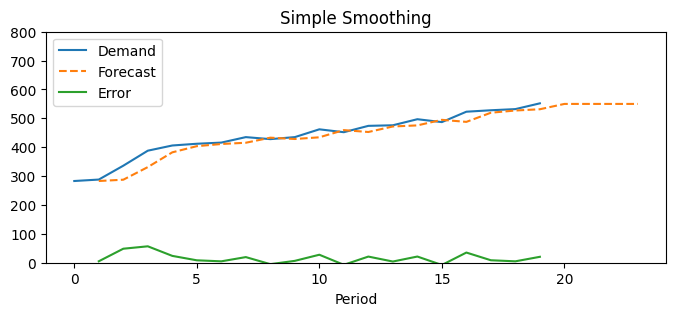

In [ ]:
d=[283, 288, 336, 388, 406, 412, 416, 435, 428, 435, 462, 452, 474, 476, 497, 487, 523, 528, 532, 552]
df_alpha_9 = simple_exp_smooth(d, 4, 0.9)
#kpi(df)
df_alpha_9.index.name = 'Period'
df_alpha_9.plot(figsize=(8,3),title='Simple Smoothing',ylim=(0,800),style=['-','--'])
print(df_alpha_9)

        Demand    Forecast       Error
Period                                
0        283.0         NaN         NaN
1        288.0  283.000000    5.000000
2        336.0  283.050000   52.950000
3        388.0  283.579500  104.420500
4        406.0  284.623705  121.376295
5        412.0  285.837468  126.162532
6        416.0  287.099093  128.900907
7        435.0  288.388102  146.611898
8        428.0  289.854221  138.145779
9        435.0  291.235679  143.764321
10       462.0  292.673322  169.326678
11       452.0  294.366589  157.633411
12       474.0  295.942923  178.057077
13       476.0  297.723494  178.276506
14       497.0  299.506259  197.493741
15       487.0  301.481196  185.518804
16       523.0  303.336384  219.663616
17       528.0  305.533021  222.466979
18       532.0  307.757690  224.242310
19       552.0  310.000114  241.999886
20         NaN  312.420112         NaN
21         NaN  312.420112         NaN
22         NaN  312.420112         NaN
23         NaN  312.42011

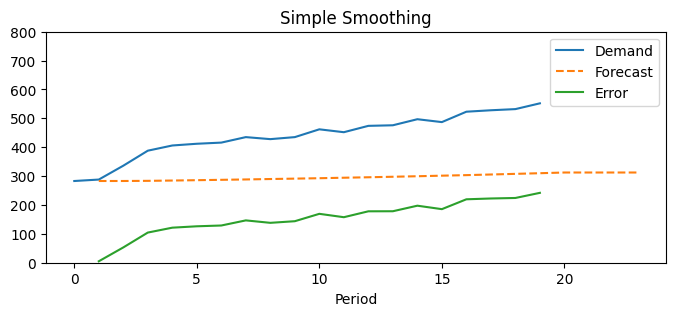

In [ ]:
d=[283, 288, 336, 388, 406, 412, 416, 435, 428, 435, 462, 452, 474, 476, 497, 487, 523, 528, 532, 552]
df_alpha_01 = simple_exp_smooth(d, 4, 0.01)
#kpi(df)
df_alpha_01.index.name = 'Period'
df_alpha_01.plot(figsize=(8,3),title='Simple Smoothing',ylim=(0,800),style=['-','--'])
print(df_alpha_01)

(c) Is it correct that forecasts for the next two years are the same? Why or Why not?
\
Yes, the forecasts for the next two years are the same, because the forecast is a sophisticated weighted moving average.

# Q2

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize as opt
import numpy as np
import statsmodels.api as sm

In [ ]:
def exp_smoothing(data, al, ex_period):
  predict = []
  predict.append(data[0])

  for i in data:
    predict.append(i*al + predict[-1]*(1-al))

  for j in range(ex_period-1):
    predict.append(predict[-1]*al + predict[-1]*(1-al))

  return predict

In [ ]:
sb_df = pd.read_csv('./SmallBusiness.csv')
sb_df

,Year,Sales
0,1,283
1,2,288
2,3,336
3,4,388
4,5,406
5,6,412
6,7,416
7,8,435
8,9,428
9,10,435


In [ ]:
X = sb_df['Year']
X = sm.add_constant(X)
#print(x)

m = sm.OLS(sb_df['Sales'], X)
res = m.fit()

print(res.summary())
print("\n")
print(f"{res.params}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.76e-11
Time:                        16:39:11   Log-Likelihood:                -89.149
No. Observations:                  20   AIC:                             182.3
Df Residuals:                      18   BIC:                             184.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        312.1000     10.221     30.535      0.0

In [ ]:
# Append rows to X DataFrame
new_rows = pd.DataFrame({'Year': [21, 22], 'const': [1, 1]})
X = pd.concat([X, new_rows], ignore_index=True)

# Perform prediction using res model
predictY = res.predict(X)

# Create a new DataFrame q3 and append rows
q3 = sb_df.copy()
new_rows_q3 = pd.DataFrame({'Year': [21, 22]})
q3 = pd.concat([q3, new_rows_q3], ignore_index=True)

# Add predictY column to q3 DataFrame
q3['predictY'] = predictY

q3

,Year,Sales,predictY
0,1,283.0,324.328571
1,2,288.0,336.557143
2,3,336.0,348.785714
3,4,388.0,361.014286
4,5,406.0,373.242857
5,6,412.0,385.471429
6,7,416.0,397.700000
7,8,435.0,409.928571
8,9,428.0,422.157143
9,10,435.0,434.385714


a.
f(X) = 312.10 + (12.23*year)

b.

$R^2$ = 0.919
>$R^2$ is a value between 0 and 1 and is typically interpreted as the proportion of the variance in the dependent variable explained by the independent variables.
>>*   When $R^2$ = 0, indicates that the dependent variable cannot be predicted at all by the independent variables
*   When $R^2$ = 1, indicates a perfect fit, where the dependent variable can be perfectly predicted by the independent variables.
*   The $R^2$ value can also be negative if the regression model is a poor fit to the data, meaning that the model does worse than simply using the mean of the dependent variable as a predictor.





c.

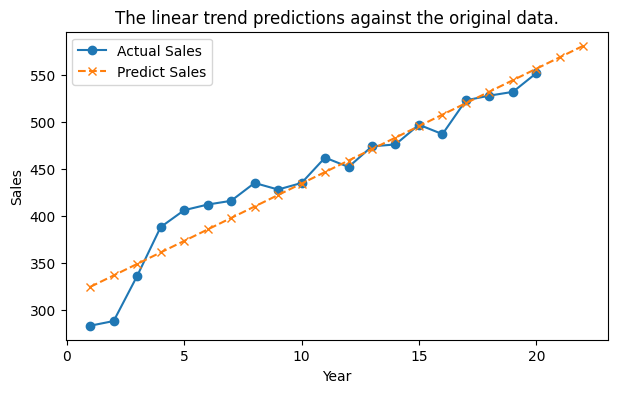

In [ ]:
plt.figure(figsize=(7,4))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks()
plt.title("The linear trend predictions against the original data.")
plt.plot(q3['Year'], q3['Sales'], marker='o', label='Actual Sales')
plt.plot(q3['Year'], q3['predictY'], marker='x', linestyle='--', label='Predict Sales')
plt.legend()
plt.show()

d.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
tr, t = train_test_split(sb_df, test_size=0.25, shuffle=False)
t

,Year,Sales
15,16,487
16,17,523
17,18,528
18,19,532
19,20,552


In [ ]:
# Calculate the result of Prediction Exponential Smoothing
data = sb_df['Sales']
alpha = 0.9
ex_period = 5
predictY_exp = exp_smoothing(data, alpha, ex_period)

In [ ]:
# Calculate the res of Prediction Linear Trend Regression
reg = LinearRegression()
X_reg = tr['Year'].values.reshape(-1, 1)
y_reg = tr['Sales'].values

reg = reg.fit(X_reg, y_reg)
predictY_reg = reg.predict(sb_df['Year'].values.reshape(-1, 1))

In [ ]:
q3_2 = sb_df.copy()
q3_2['predictY_exp'] = predictY_exp[:len(data)]
q3_2['predictY_reg'] = predictY_reg
q3_2

,Year,Sales,predictY_exp,predictY_reg
0,1,283,283.000000,317.583333
1,2,288,283.000000,331.147619
2,3,336,287.500000,344.711905
3,4,388,331.150000,358.276190
4,5,406,382.315000,371.840476
5,6,412,403.631500,385.404762
6,7,416,411.163150,398.969048
7,8,435,415.516315,412.533333
8,9,428,433.051631,426.097619
9,10,435,428.505163,439.661905


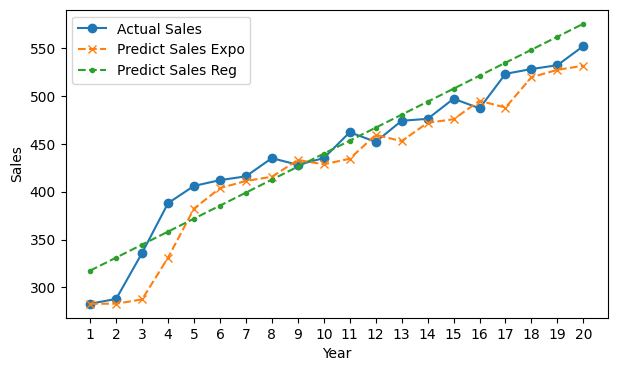

In [ ]:
plt.figure(figsize=(7, 4))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(q3_2['Year'])
plt.plot(q3_2['Year'], q3_2['Sales'], marker='o', label='Actual Sales')
plt.plot(q3_2['Year'], q3_2['predictY_exp'], marker='x', linestyle='--', label='Predict Sales Expo')
plt.plot(q3_2['Year'], q3_2['predictY_reg'], marker='.', linestyle='--', label='Predict Sales Reg')
plt.legend()
plt.show()

# Q3
Refer to the multiplicative seasonal effect in the lecture note. Please implement the function and provide forecasts of 2003 using the TrendRegression.csv.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import statsmodels.api as sm


    Year  Qtr  TimePeriod  ActualSales  TimeSquare   Prediction
0   1998    1           1        684.2           1   673.956948
1   1998    2           2        584.1           4   701.480844
2   1998    3           3        765.4           9   736.238267
3   1998    4           4        892.3          16   778.229217
4   1999    1           5        885.4          25   827.453694
5   1999    2           6        677.0          36   883.911699
6   1999    3           7       1006.6          49   947.603230
7   1999    4           8       1122.1          64  1018.528288
8   2000    1           9       1163.4          81  1096.686873
9   2000    2          10        993.2         100  1182.078985
10  2000    3          11       1312.5         121  1274.704624
11  2000    4          12       1545.3         144  1374.563790
12  2001    1          13       1596.2         169  1481.656483
13  2001    2          14       1260.4         196  1595.982703
14  2001    3          15       1735.2  

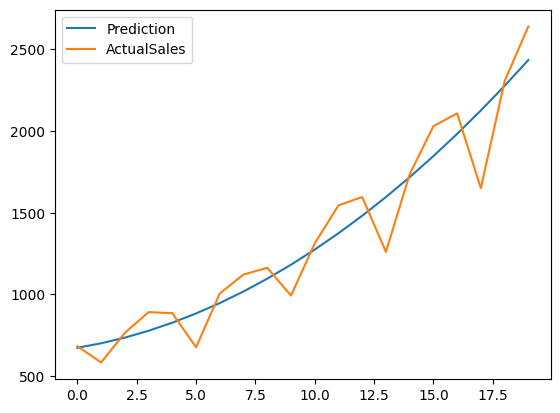

In [ ]:
# load the data file
dfT = pd.read_csv('TrendRegression.csv')

# add a new feature that represents the square of the time period
dfT['TimeSquare'] = dfT['TimePeriod'] ** 2

# define the independent variables
trendIndep = dfT[['TimePeriod', 'TimeSquare']]

# add a constant column to the independent variables
trendIndep = sm.add_constant(trendIndep)

# initialize and fit the OLS regression model
model_trend = sm.OLS(dfT[['ActualSales']], trendIndep)
results_trend = model_trend.fit()

# make predictions
dfT['Prediction'] = results_trend.predict(trendIndep)

# plot the actual and predicted sales
dfT[['Prediction', 'ActualSales']].plot()

print(dfT)

[[  1.  21. 441.]
 [  1.  22. 484.]
 [  1.  23. 529.]
 [  1.  24. 576.]]
[2598.805      2770.99943609 2950.42739918 3137.08888927]
    Year  Qtr  TimePeriod  ActualSales  TimeSquare   Prediction
0   1998    1         1.0        684.2         1.0   673.956948
1   1998    2         2.0        584.1         4.0   701.480844
2   1998    3         3.0        765.4         9.0   736.238267
3   1998    4         4.0        892.3        16.0   778.229217
4   1999    1         5.0        885.4        25.0   827.453694
5   1999    2         6.0        677.0        36.0   883.911699
6   1999    3         7.0       1006.6        49.0   947.603230
7   1999    4         8.0       1122.1        64.0  1018.528288
8   2000    1         9.0       1163.4        81.0  1096.686873
9   2000    2        10.0        993.2       100.0  1182.078985
10  2000    3        11.0       1312.5       121.0  1274.704624
11  2000    4        12.0       1545.3       144.0  1374.563790
12  2001    1        13.0       1596.

<Axes: >

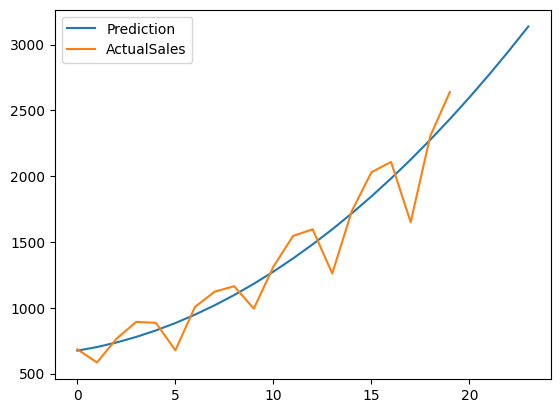

In [ ]:
# 用之後的去預測 => 21:2003的第一期， 22:2003的第二期， 23:2003的第三期， 24:2003的第四期
test=[[21,441],[22,484],[23,529],[24,576]]
newAdv = sm.add_constant(test)
print(newAdv)
predictions_2003=results_trend.predict(newAdv)
print(predictions_2003)

new_data_2003 = pd.DataFrame({'Year': [2003] * 4, 'Qtr': [1, 2, 3, 4], 'TimePeriod': [21.0, 22.0, 23.0, 24.0],                               'TimeSquare': [441.0, 484.0, 529.0, 576.0], 'Prediction': predictions_2003})
combined_data = pd.concat([dfT, new_data_2003], ignore_index=True)
print(combined_data)
combined_data[['Prediction','ActualSales']].plot()

2598.805＋2770.99943609＋2950.42739918＋3137.08888927≈11457.2
\
The forecasts of 2003 is 11457.2.

# Q4

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

(a) Which of the following methods would be suitable for forecasting this series if applied to the raw data? (1) moving average (2) simple exponential smoothing (3) Holt-Winter’s model-4pts

> 縮排段落



Ans: (3) Holt-Winter's model has consider seasonality and trend which can be found in the graph. We can see that the trend is a little bit positive. In terms of seasonality, we can see that Q3 always has the highest shimpents in that year and Q4 always has the lowest shipment in that year.
So we can infer that there exist a seasonality in this data, which need to be solved by Holt-Winter's model

(b) Apply a moving average with window span w=4 to th data. Use all but the last year as the training set. Create a time plot for the moving average series. Is the forecast for Q1-1990 most likely to underestimate, overestimate or accuratley estimate the acutal sales on Q1-1990? Explain.-8pts

In [ ]:
df = pd.read_csv("./ApplianceShipments.csv")

In [ ]:
df

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123
5,Q2-1986,4522
6,Q3-1986,4657
7,Q4-1986,4030
8,Q1-1987,4493
9,Q2-1987,4806


In [ ]:
#MA1
def moving_average(d, extra_periods=1, n=3):

    # Historical period length
    cols = len(d)
    # Append np.nan into the demand array to cover future periods
    #np.zeros? actual or initial?
    d = np.append(d,[np.nan]*extra_periods)
    # Define the forecast array
    f = np.full(cols+extra_periods,np.nan)

    # Create all the n+1 forecast until end of historical period
    for t in range(n,cols):
        f[t] = np.mean(d[t-n:t])


    # Forecast for all extra periods
    # given t=20-->how is it?
    f[t+1:] = np.mean(d[t-n+1:t+1])
    # All extra periods with same forecasts?




    # Return a dataframe from array data
    df = pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Error':d-f})

    return df

In [ ]:
result = moving_average(np.array(df['Shipments']), extra_periods = 1, n = 4)

In [ ]:
print("Forecast Q1-1990: "+str(result.iloc[20,1]))

Forecast Q1-1990: 4565.75


In [ ]:
values = [i for i in range(0,21)]

In [ ]:
result[['Demand', 'Forecast']]

,Demand,Forecast
0,4009.0,NaN
1,4321.0,NaN
2,4224.0,NaN
3,3944.0,NaN
4,4123.0,4124.50
5,4522.0,4153.00
6,4657.0,4203.25
7,4030.0,4311.50
8,4493.0,4333.00
9,4806.0,4425.50


<Axes: >

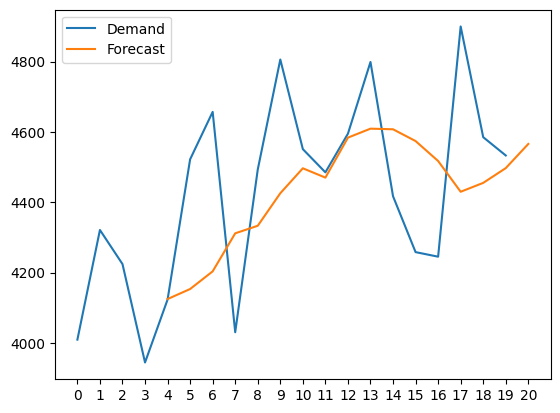

In [ ]:
result[['Demand', 'Forecast']].plot(xticks = values)

From the plot above, we can compute the average shipments in every Q1 (0, 4, 8, 12, 16) and to compare with our forecast Q1-1990

In [ ]:
average = (result['Demand'].loc[0]+result['Demand'].loc[4]+result['Demand'].loc[8]+result['Demand'].loc[12]+result['Demand'].loc[16])/5
print('Q1 的平均: '+ str(average))
print('Q1-1990預測值: '+ str(result['Forecast'].loc[20]))

Q1 的平均: 4293.0
Q1-1990預測值: 4565.75


Ans: It is more likey that Q1-1990 overestimate because the value of Q1-1990 we forecast is higher than the average of Q1

(c) We now focus on forecasting beyond 1989. Use all but the last year as the training set and the last four quarters as the validation set. First, fit a regression model to sales with a linear trend and quarterly seasonality to the training data. Next, apply Holt-Winter’s model with multiplicative seasonal effect to the training data.

In [ ]:
import pandas as pd
# read data
dfT = pd.read_csv("./ApplianceShipments.csv")
print(dfT)

    Quarter  Shipments
0   Q1-1985       4009
1   Q2-1985       4321
2   Q3-1985       4224
3   Q4-1985       3944
4   Q1-1986       4123
5   Q2-1986       4522
6   Q3-1986       4657
7   Q4-1986       4030
8   Q1-1987       4493
9   Q2-1987       4806
10  Q3-1987       4551
11  Q4-1987       4485
12  Q1-1988       4595
13  Q2-1988       4799
14  Q3-1988       4417
15  Q4-1988       4258
16  Q1-1989       4245
17  Q2-1989       4900
18  Q3-1989       4585
19  Q4-1989       4533


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:              Shipments   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     5.576
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0332
Time:                        14:21:17   Log-Likelihood:                -109.21
No. Observations:                  16   AIC:                             222.4
Df Residuals:                      14   BIC:                             224.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4160.6985    113.792     36.564      0.0

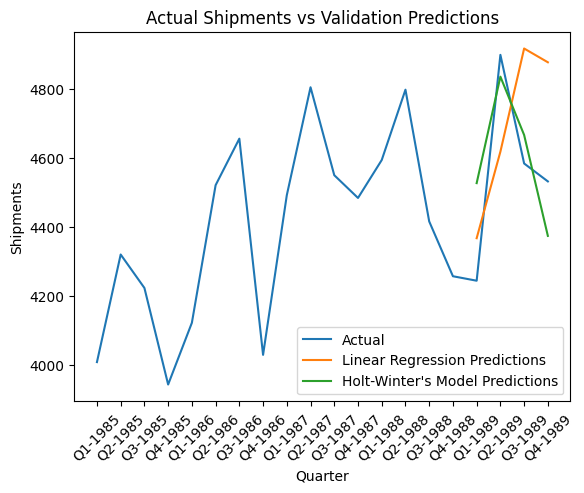

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Divide data into training set and validation set
train = dfT[:-4]
validation = dfT[-4:]

# Linear Regression Model
X_train = sm.add_constant(np.arange(len(train)))
model = sm.OLS(train['Shipments'], X_train)
results = model.fit()
print(results.summary())

# Seasonal trend
seasonal = train.groupby(train['Quarter'].str[-4:])['Shipments'].mean().values
seasonal_coef = seasonal / np.mean(train['Shipments'])

# Validation set prediction
X_validation = sm.add_constant(np.arange(len(train), len(train)+len(validation)))
validation_predictions = results.predict(X_validation) * seasonal_coef

# Linear Regression Model Predictions
print("Linear Regression Model Predictions:")
print(validation_predictions)

# Holt-Winter's Model
model_hw = ExponentialSmoothing(train['Shipments'], seasonal_periods=4, trend='add', seasonal='mul')
hw_results = model_hw.fit()
hw_predictions = hw_results.forecast(len(validation))

# Holt-Winter's Model Predictions
print("Holt-Winter's Model Predictions:")
print(hw_predictions)

# Plot the charts
plt.plot(dfT['Quarter'], dfT['Shipments'], label='Actual')
plt.plot(dfT['Quarter'][-4:], validation_predictions, label='Linear Regression Predictions')
plt.plot(dfT['Quarter'][-4:], hw_predictions, label='Holt-Winter\'s Model Predictions')

plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.title('Actual Shipments vs Validation Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

(d) Following the above question (d), compute MAPE for the validation data for both models. Which model would you prefer for forecasting Q1-1990?

In [ ]:
# Calculate MAPE for Linear Regression predictions
mape_lr = np.mean(np.abs((validation['Shipments'] - validation_predictions) / validation['Shipments'])) * 100
print(f"MAPE for Linear Regression Model: {mape_lr:.2f}%")


# Calculate MAPE for Holt-Winter's predictions
mape_hw = np.mean(np.abs((validation['Shipments'] - hw_predictions) / validation['Shipments'])) * 100
print(f"MAPE for Holt-Winter's Model: {mape_hw:.2f}%")

# Show the result
if mape_lr < mape_hw:
    print("Linear Regression Model is preferred for forecasting Q1-1990.")
elif mape_lr > mape_hw:
    print("Holt-Winter's Model is preferred for forecasting Q1-1990.")
else:
    print("Both models have the same MAPE. Either model can be used for forecasting Q1-1990.")

MAPE for Linear Regression Model: 5.88%
MAPE for Holt-Winter's Model: 3.31%
Holt-Winter's Model is preferred for forecasting Q1-1990.


# Q5

（Ａ）、

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize as opt
import numpy as np
import statsmodels.api as sm

In [ ]:
#Read external files
from google.colab import files
uploaded = files.upload()

Saving Duque.csv to Duque.csv


In [ ]:
#read data as DF
import io
dfT = pd.read_csv(io.BytesIO(uploaded['Duque.csv']))
print(dfT)

    Obs  Day  Temp  Demand
0     1    1    92    57.7
1     2    2    96    71.5
2     3    3    96    73.0
3     4    4    89    68.6
4     5    5    95    71.2
5     6    6    94    67.2
6     7    7    99    62.7
7     8    1    96    64.6
8     9    2    96    68.5
9    10    3    91    68.8
10   11    4    93    65.8
11   12    5    88    61.5
12   13    6    90    57.6
13   14    7    92    54.2
14   15    1    98    61.1
15   16    2    94    64.5
16   17    3    99    68.6
17   18    4    94    67.1
18   19    5    98    76.2
19   20    6    94    65.7
20   21    7    97    60.9
21   22    1    88    54.5
22   23    2    92    69.7
23   24    3    89    68.3
24   25    4    96    68.8
25   26    5    92    70.8
26   27    6    90    67.0
27   28    7    99    58.3


In [ ]:
from sklearn.linear_model import LinearRegression

demand=np.array(dfT.Demand)
temperature = np.array(dfT.Temp)
df = pd.DataFrame.from_dict({'Temperature':temperature,'Demand':demand})
print(df)
reg = LinearRegression()
reg = reg.fit(df[['Temperature']],df[['Demand']]) #fit(x,y)
print('intercept:',reg.intercept_)
print('coefficient:',reg.coef_)
#R^2
print(reg.score(df[['Temperature']],df['Demand']))

    Temperature  Demand
0            92    57.7
1            96    71.5
2            96    73.0
3            89    68.6
4            95    71.2
5            94    67.2
6            99    62.7
7            96    64.6
8            96    68.5
9            91    68.8
10           93    65.8
11           88    61.5
12           90    57.6
13           92    54.2
14           98    61.1
15           94    64.5
16           99    68.6
17           94    67.1
18           98    76.2
19           94    65.7
20           97    60.9
21           88    54.5
22           92    69.7
23           89    68.3
24           96    68.8
25           92    70.8
26           90    67.0
27           99    58.3
intercept: [31.21238278]
coefficient: [[0.36560841]]
0.05026787813711475


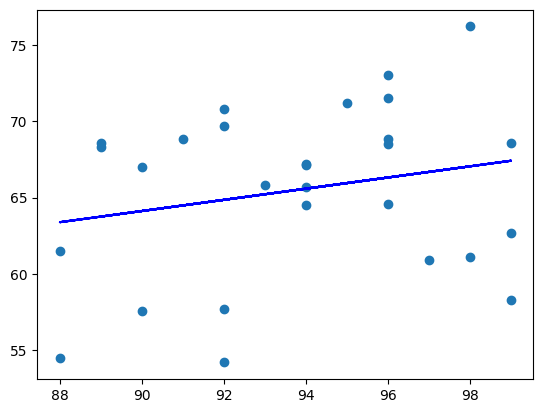

In [ ]:

import matplotlib.pyplot as plt
#plot x-y linearity: actual vs. fitted (simple regression only)
plt.plot(df['Temperature'], df['Demand'], "o", label="data")
y_pred = reg.predict(df[['Temperature']])
plt.plot(df['Temperature'], y_pred, "b-", label="regression")


y = 31.21238278+0.36560841X

（Ｂ）

In [ ]:
#read data as DF
#Read external files
from google.colab import files
uploaded = files.upload()
import io
dfT = pd.read_csv(io.BytesIO(uploaded['Duque.csv']))
print(dfT)

Saving Duque.csv to Duque (1).csv
    Obs  Day  Temp  Demand
0     1    1    92    57.7
1     2    2    96    71.5
2     3    3    96    73.0
3     4    4    89    68.6
4     5    5    95    71.2
5     6    6    94    67.2
6     7    7    99    62.7
7     8    1    96    64.6
8     9    2    96    68.5
9    10    3    91    68.8
10   11    4    93    65.8
11   12    5    88    61.5
12   13    6    90    57.6
13   14    7    92    54.2
14   15    1    98    61.1
15   16    2    94    64.5
16   17    3    99    68.6
17   18    4    94    67.1
18   19    5    98    76.2
19   20    6    94    65.7
20   21    7    97    60.9
21   22    1    88    54.5
22   23    2    92    69.7
23   24    3    89    68.3
24   25    4    96    68.8
25   26    5    92    70.8
26   27    6    90    67.0
27   28    7    99    58.3


                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.376
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.251
Time:                        02:44:22   Log-Likelihood:                -86.635
No. Observations:                  28   AIC:                             177.3
Df Residuals:                      26   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2124     29.259      1.067      0.2

<Axes: >

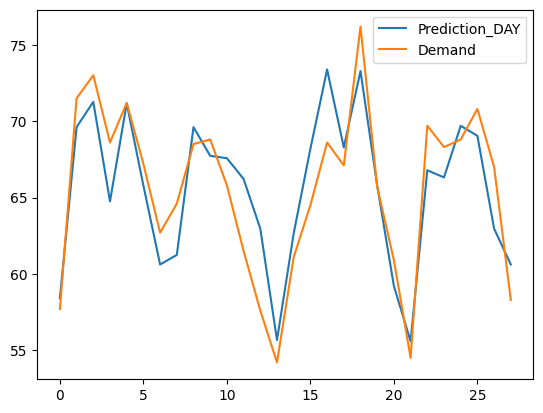

In [ ]:
#MR1
#Time as independent vars
trendIndep=dfT[['Temp']]
trendIndep = sm.add_constant(trendIndep)
model_trend = sm.OLS(dfT['Demand'],trendIndep) #model(y,x)
results_trend = model_trend.fit()
print(results_trend.summary())
dfT['Prediction']=results_trend.predict(trendIndep)

#MR2
#seasonal dummies
#drop the first column of the resulting df (since n-1 dummy vars suffice)
dummy = pd.get_dummies(dfT['Day'], drop_first=False)
print(dummy)
trendIndep2 = pd.concat([trendIndep, dummy], axis=1)
print(trendIndep2)

#Alternative way to create dummy
#seasons=dfT['Qtr']
#dummy = pd.get_dummies(seasons).values
#print(dummy)
#trendIndep2=np.column_stack((trendIndep, dummy[:, 1:])) #dummy[row,column(1: 3 dummies for 4 seansons)]
#trendIndep2 = pd.DataFrame(trendIndep2,columns = ['constant','Time','TimeSq','Q2','Q3','Q4'])
#print(trendIndep2)

model_season = sm.OLS(dfT['Demand'], trendIndep2)  # model(y, x)
results_season = model_season.fit()
print(results_season.summary())
dfT['Prediction_DAY'] = results_season.predict(trendIndep2)
dfT[['Prediction_DAY', 'Demand']].plot()

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     9.838
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           2.67e-05
Time:                        02:44:25   Log-Likelihood:                -66.477
No. Observations:                  28   AIC:                             149.0
Df Residuals:                      20   BIC:                             159.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6884     15.599     -0.044      0.9

<Axes: >

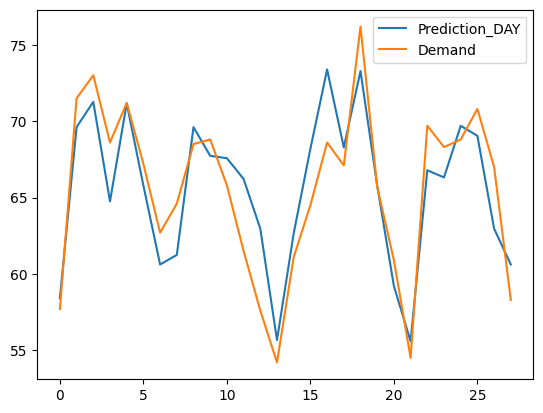

In [ ]:
model_season = sm.OLS(dfT['Demand'],trendIndep2) #model(y,x)
results_season = model_season.fit()
print(results_season.summary())
dfT['Prediction_DAY']=results_season.predict(trendIndep2)
dfT[['Prediction_DAY','Demand']].plot()

R-squared:                       0.775

R-squared的意義為用來衡量回歸模型對於觀察資料的變異解釋程度。它的值介於0和1之間，越接近1表示模型能夠很好地解釋資料的變異，越接近0則表示模型解釋能力較弱。在多元線性回歸中，R^2統計量可以解釋回歸模型對於最高用電量需求變異的解釋程度，數值越高表示模型能夠更好地解釋觀察資料的變異。








（Ｃ）



<Axes: >

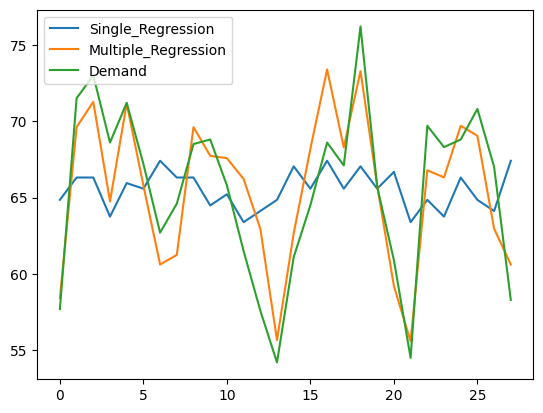

In [ ]:
dfT['Single_Regression']=results_trend.predict(trendIndep)
dfT['Multiple_Regression']=results_season.predict(trendIndep2)
dfT[['Single_Regression','Multiple_Regression','Demand']].plot()

以下是 Single_Regression模型的統計結果：
Intercept (截距): 31.21238278
Coefficient (係數): 0.36560841
R-squared (決定係數): 0.05026787813711475

這些統計數字提供了 MR1 模型的基本統計結果。截距表示在溫度為 0 時的預測需求，係數表示每一單位溫度增加時的需求變化。R-squared 則衡量模型對於實際需求變異的解釋程度，這裡的 R-squared 值為 0.0502，表示溫度只能解釋需求變異的 5.02%。
這些結果顯示 MR1 模型的擬合效果較差，溫度作為單一解釋變數對需求的解釋能力有限。

以下是 Multiple_Regression 模型的統計結果：
Intercept (截距): 60.14407135
Coefficients (係數):
Temp: 0.32524488
2: -3.70442386
3: -2.35922162
4: -4.03322162
5: -1.54861538
6: -3.70442386
7: -5.24442386
R-squared（決定係數）：0.235

這些統計數字提供了 MR2 模型的基本統計結果。截距表示在各個季節虛擬變數皆為零時的預測需求，係數則表示每一個變數的影響程度。由於這些變數是虛擬變數，代表各個季節的存在與否，所以這些係數反映了各個季節對需求的影響。
這些結果顯示 MR2 模型相對於 MR1 模型，對於需求變化的解釋能力有所提升。

（Ｄ）


In [ ]:
# Temperature value for prediction
new_temperature = 94

# Creating a new DataFrame with the constant and dummy variables for the given temperature
new_data = pd.DataFrame({'Temp': [new_temperature]})
new_data = sm.add_constant(new_data)

# Adding dummy variables for the days of the week
dummy_days = pd.get_dummies(dfT['Day'], drop_first=False)
dummy_days['7'] = 0  # Adding the missing column filled with zeros
new_data = pd.concat([new_data, dummy_days], axis=1)

# Check if the number of columns in new_data matches the number of columns in the model
if new_data.shape[1] != trendIndep2.shape[1]:
    print('Error: Number of columns in new_data does not match the model.')
else:
    # Predicting the demand for the given temperature
    predicted_demand = results_season.predict(new_data)

    # Computing the 95% prediction interval
    prediction_interval = results_season.get_prediction(new_data).conf_int(alpha=0.05)

    print('Predicted Demand:', predicted_demand[0])
    print('Prediction Interval (95%):', prediction_interval[0])


Predicted Demand: -64.00653598667421
Prediction Interval (95%): [-3122.26141128  2994.2483393 ]
